In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
food = pd.read_csv(r"C:\Users\rajwo\Downloads\u_food_marketing.csv")
food

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [5]:
duplicates = food[food.duplicated(keep=False)]
dup_sorted = duplicates.sort_values(by='Income')
dup_sorted.head(6)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
28,10979.0,0,0,34,8,4,10,2,2,4,...,0,0,0,0,0,1,0,26,22,0
1118,10979.0,0,0,34,8,4,10,2,2,4,...,0,0,0,0,0,1,0,26,22,0
246,15287.0,1,0,60,1,2,8,4,3,13,...,0,0,0,0,1,0,0,18,5,1
1183,15287.0,1,0,60,1,2,8,4,3,13,...,0,0,0,0,1,0,0,18,5,1
1087,15315.0,0,0,27,7,4,13,15,8,17,...,0,0,1,0,0,0,0,47,30,0
541,15315.0,0,0,27,7,4,13,15,8,17,...,0,0,1,0,0,0,0,47,30,0


In [7]:
food=food.drop_duplicates(keep='first')
food[(food['Income'] == 10979.0) | (food['Income'] == 15287.0)]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
28,10979.0,0,0,34,8,4,10,2,2,4,...,0,0,0,0,0,1,0,26,22,0
246,15287.0,1,0,60,1,2,8,4,3,13,...,0,0,0,0,1,0,0,18,5,1


In [11]:
pd.set_option('display.max.columns',50)

In [13]:
food['Total_Children'] = food[['Kidhome','Teenhome']].sum(axis=1)
food[['Kidhome','Teenhome','Total_Children']].sample(n=5)

,Kidhome,Teenhome,Total_Children
1449,0,1,1
1818,1,1,2
253,1,1,2
2109,1,1,2
1622,0,0,0


In [15]:
#Condensing the various marital status' into one column & adding an associated string value
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5, 0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4, 0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3, 0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2, 0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1, 0:0})

food['Marital_Status'] = food[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis=1)

food['Marital_Status_str'] = food['Marital_Status'].map({5: 'Divorced',4: 'Married',3: 'Single',2: 'Together',1: 'Widow'})

In [21]:
#Condensing the various marital status' into one column & adding an associated string value
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1, 0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2, 0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3, 0:0})
food['education_Master'] = food['education_Master'].replace({1:4, 0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5, 0:0})

food['Education_Status'] = food[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis=1)

food['Education_Status_Str'] = food['Education_Status'].map({5: 'education_PhD',4: 'education_Master',3: 'education_Graduation',2: 'education_Basic',1: 'education_2n Cycle'})

In [25]:
food['AcceptedCmpOverall'] = food[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)
food['Accepted_Campaign'] = food[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)
food['Accepted_Campaign'] = (food['Accepted_Campaign']!=0).astype(int)
food.rename(columns = {'Response':'AdditionalCmp'}, inplace=True)

In [43]:
age_group = [(23,30),(31,40),(41,50),(51,60),(61,70),(71,85)]

def assign_age_group(Age):
    for age_range in age_group:
        if age_range[0] <= Age <= age_range[1]:
            return f'{age_range[0]}-{age_range[1]}'
    return('Unknown')

food['Age_Group'] = food['Age'].apply(assign_age_group)

food[['Age','Age_Group']].head()

,Age,Age_Group
0,63,61-70
1,66,61-70
2,55,51-60
3,36,31-40
4,39,31-40


In [45]:
food.corr(method='pearson', numeric_only = True)['Accepted_Campaign'].sort_values(ascending=False)

Accepted_Campaign       1.000000
AcceptedCmpOverall      0.820160
AdditionalCmp           0.686288
AcceptedCmp4            0.463804
AcceptedCmp3            0.457291
AcceptedCmp5            0.449056
AcceptedCmp1            0.427119
MntWines                0.418647
MntTotal                0.396330
MntRegularProds         0.394459
NumCatalogPurchases     0.324215
MntMeatProducts         0.302546
Income                  0.295926
NumWebPurchases         0.220552
MntGoldProds            0.188638
AcceptedCmp2            0.183713
MntSweetProducts        0.159904
MntFishProducts         0.152153
NumStorePurchases       0.146054
MntFruits               0.144209
Customer_Days           0.084975
Education_Status        0.067411
education_PhD           0.055422
marital_Single          0.049601
marital_Widow           0.033197
Age                     0.022613
marital_Divorced        0.012142
education_Master        0.004979
Marital_Status         -0.010530
education_Graduation   -0.012701
Complain  

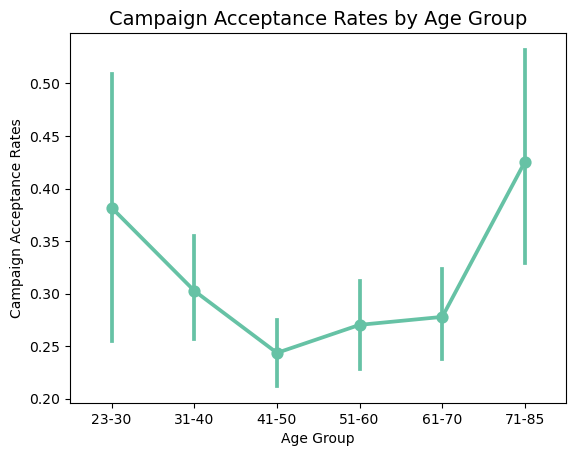

In [47]:
age_order = ['23-30','31-40','41-50','51-60','61-70','71-85']

sns.pointplot(
    data=food, x='Age_Group', y='Accepted_Campaign', order=age_order, color = '#66c2a5'
)
plt.title('Campaign Acceptance Rates by Age Group', fontsize=14)
plt.ylabel('Campaign Acceptance Rates', fontsize=10)
plt.xlabel('Age Group',fontsize=10)
plt.show()

In [49]:
age_group_stats = food.groupby('Age_Group')['Accepted_Campaign'].agg(
    total_customers = 'count',
    accepted_customers = 'sum')

age_group_stats['acceptance rate (%)']=(
    age_group_stats['accepted_customers'] / age_group_stats['total_customers'] * 100).round(2)

age_group_stats = age_group_stats.reset_index()
age_group_stats

,Age_Group,total_customers,accepted_customers,acceptance rate (%)
0,23-30,55,21,38.18
1,31-40,327,99,30.28
2,41-50,669,163,24.36
3,51-60,455,123,27.03
4,61-70,421,117,27.79
5,71-85,94,40,42.55


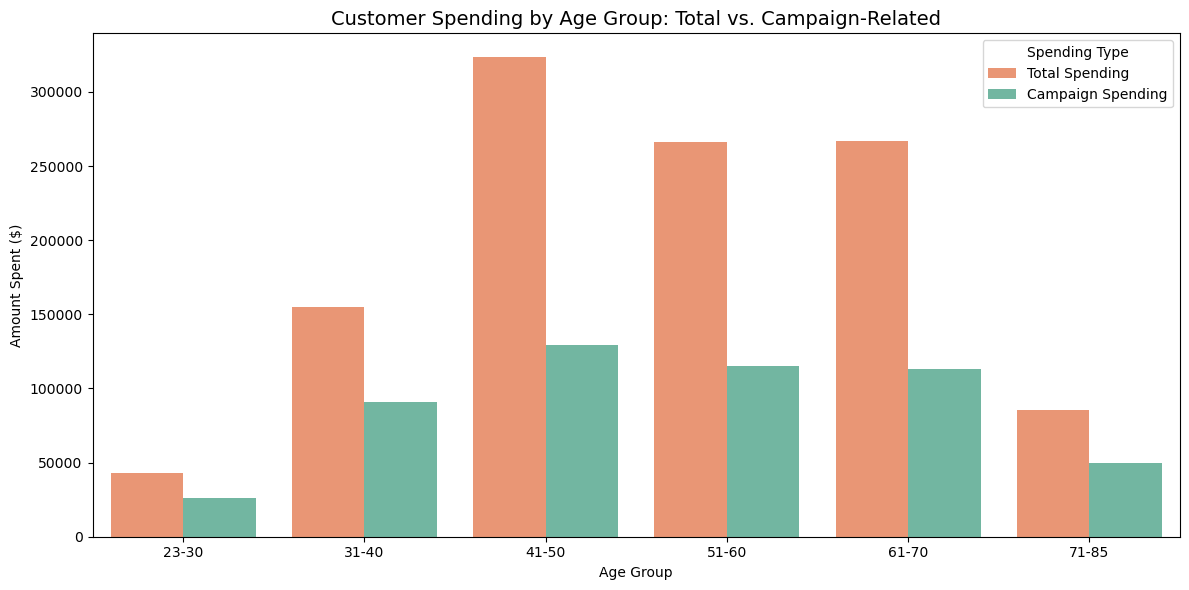

In [51]:
total_spending_by_age=(
    food.groupby('Age_Group')['MntTotal']
    .sum()
    .reset_index()
    .rename(columns={'MntTotal':'Total Spending'})
)
campaign_spending_by_age=(
    food[food['Accepted_Campaign'] != 0]
    .groupby('Age_Group')['MntTotal']
    .sum()
    .reset_index()
    .rename(columns={'MntTotal':'Campaign Spending'})
)
spending_comparison = pd.merge(
    total_spending_by_age, campaign_spending_by_age, on='Age_Group', how='left'
).fillna(0)

plot_data = spending_comparison.melt(
    id_vars='Age_Group',
    value_vars=['Total Spending', 'Campaign Spending'],
    var_name='Spending_Type',
    value_name='Amount',
)
custom_palette = {'Campaign Spending': '#66c2a5', 'Total Spending': '#fc8d62'} 

plt.figure(figsize=(12,6))
sns.barplot(
    data=plot_data, x='Age_Group', y='Amount', hue='Spending_Type',palette=custom_palette
)

plt.title('Customer Spending by Age Group: Total vs. Campaign-Related', fontsize = 14)
plt.xlabel('Age Group', fontsize = 10)
plt.ylabel('Amount Spent ($)', fontsize = 10)
plt.legend(title='Spending Type')
plt.tight_layout()
plt.show()

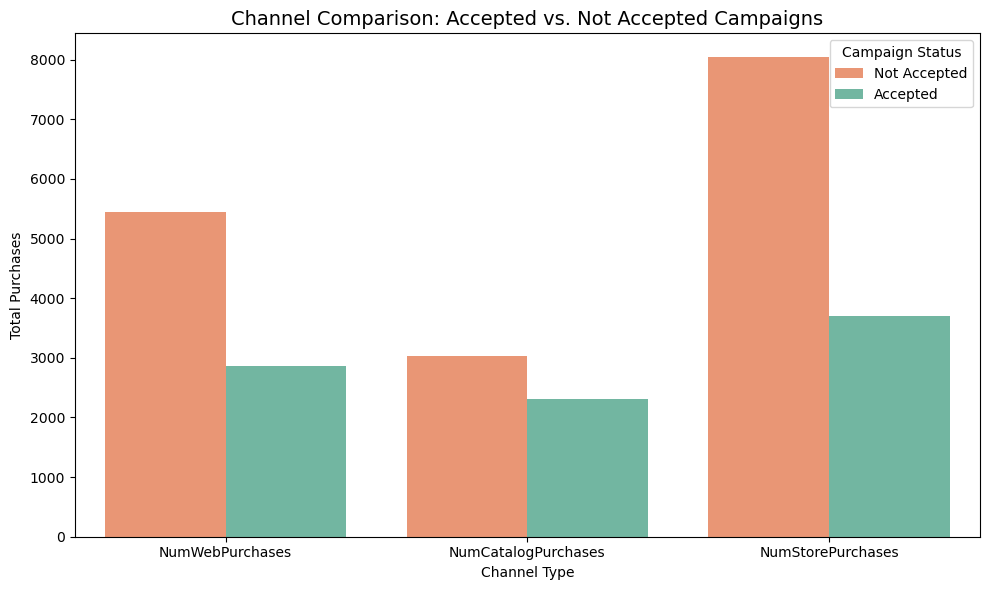

In [53]:
# Filter accepted and non-accepted campaign customers
accepted = food[food['Accepted_Campaign'] != 0]
not_accepted = food[food['Accepted_Campaign'] == 0]

# Sum purchases by channel for each group
accepted_sum = accepted[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
not_accepted_sum = not_accepted[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

# Convert to tidy DataFrames
accepted_df = accepted_sum.reset_index()
accepted_df.columns = ['Type of Purchase', 'Sum']
accepted_df['Campaign Status'] = 'Accepted'

not_accepted_df = not_accepted_sum.reset_index()
not_accepted_df.columns = ['Type of Purchase', 'Sum']
not_accepted_df['Campaign Status'] = 'Not Accepted'

custom_palette = {'Accepted': '#66c2a5', 'Not Accepted': '#fc8d62'} 

# Combine the two for plotting
combined = pd.concat([not_accepted_df, accepted_df])
plt.figure(figsize=(10,6))
sns.barplot(data=combined, x='Type of Purchase', y='Sum', hue='Campaign Status', palette= custom_palette)

plt.title('Channel Comparison: Accepted vs. Not Accepted Campaigns', fontsize = 14)
plt.xlabel('Channel Type', fontsize = 10)
plt.ylabel('Total Purchases', fontsize = 10)
plt.legend(title='Campaign Status')
plt.tight_layout()
plt.show()

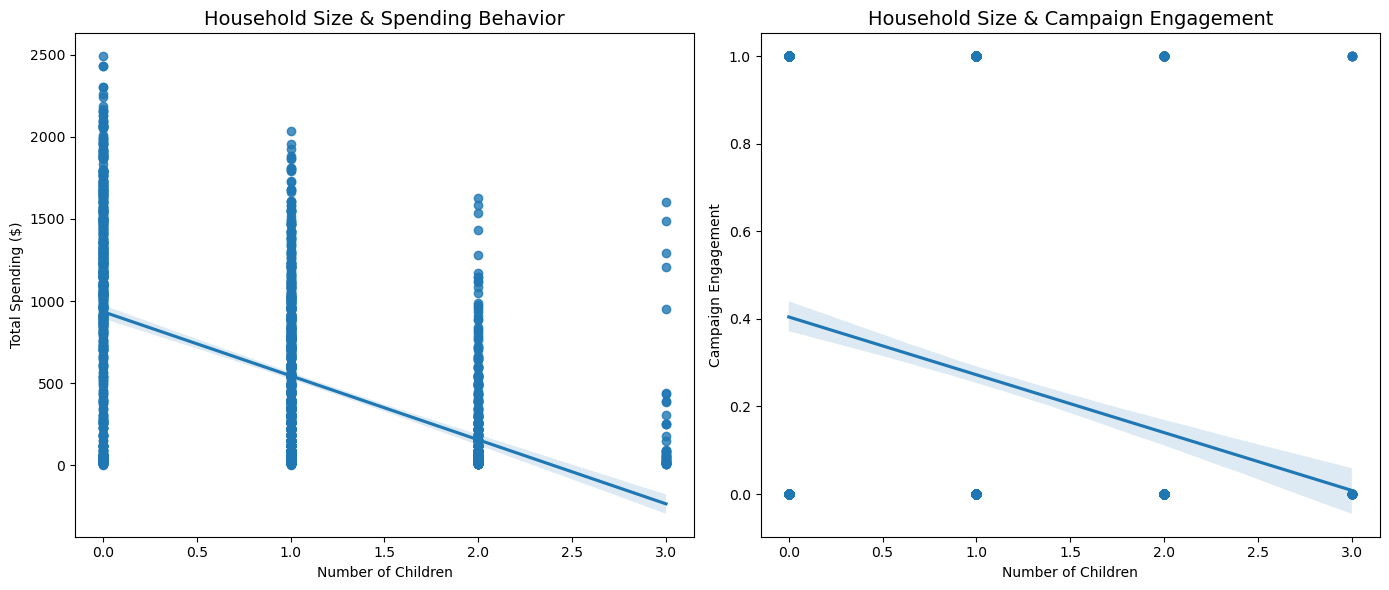

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First regplot
sns.regplot(x='Total_Children', y='MntTotal', data=food, ax=axes[0])
axes[0].set_title('Household Size & Spending Behavior', fontsize=14)
axes[0].set_xlabel('Number of Children', fontsize=10)
axes[0].set_ylabel('Total Spending ($)', fontsize=10)

# Second regplot
sns.regplot(x='Total_Children', y='Accepted_Campaign', data=food, ax=axes[1])
axes[1].set_title('Household Size & Campaign Engagement',fontsize=14)
axes[1].set_xlabel('Number of Children', fontsize=10)
axes[1].set_ylabel('Campaign Engagement', fontsize=10)

plt.tight_layout()
plt.show()

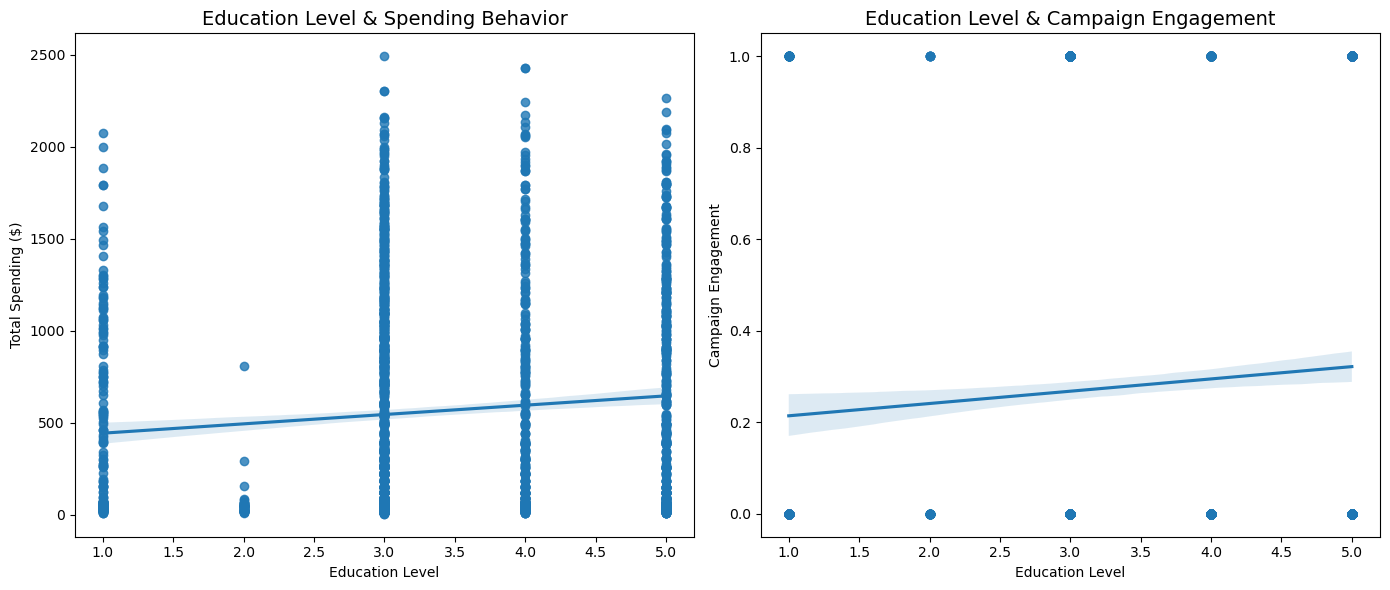

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First regplot
sns.regplot(x='Education_Status', y='MntTotal', data=food, ax=axes[0])
axes[0].set_title('Education Level & Spending Behavior', fontsize=14)
axes[0].set_xlabel('Education Level', fontsize=10)
axes[0].set_ylabel('Total Spending ($)', fontsize=10)

# Second regplot
sns.regplot(x='Education_Status', y='Accepted_Campaign', data=food, ax=axes[1])
axes[1].set_title('Education Level & Campaign Engagement',fontsize=14)
axes[1].set_xlabel('Education Level', fontsize=10)
axes[1].set_ylabel('Campaign Engagement', fontsize=10)

plt.tight_layout()
plt.show()

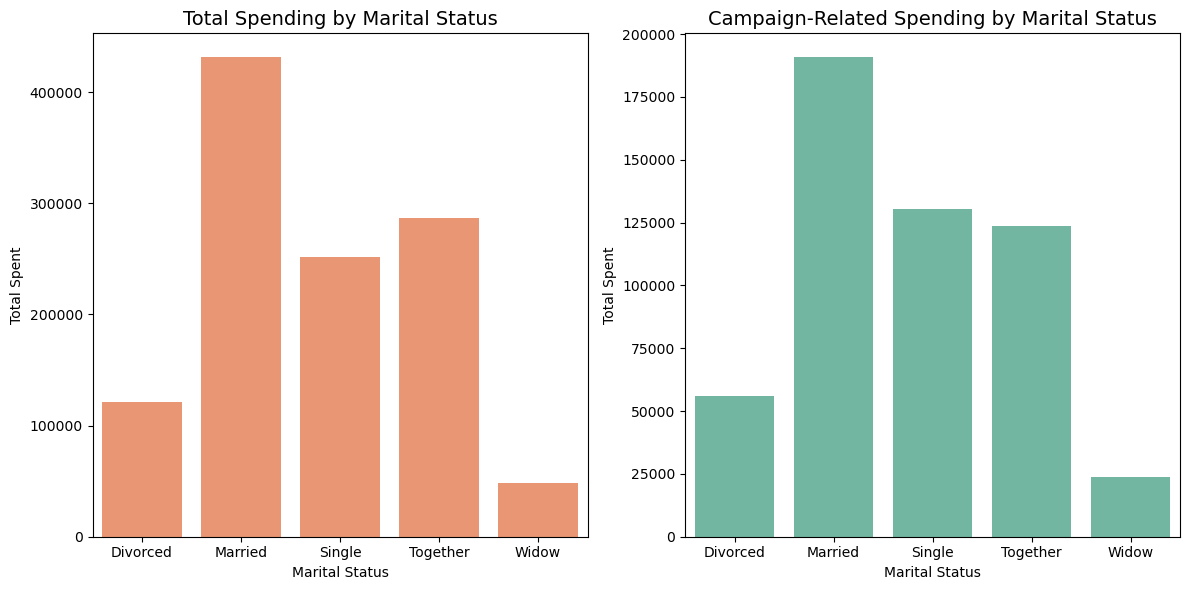

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

accepted_cmp = food[food['Accepted_Campaign'] != 0]
marital_total = food.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()
marital_campaign = accepted_cmp.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()

# First barplot
sns.barplot(x='Marital_Status_str', y = 'MntTotal', data=marital_total, color="#fc8d62", ax=axes[0])
axes[0].set_title('Total Spending by Marital Status', fontsize=14)
axes[0].set_ylabel("Total Spent", fontsize=10)
axes[0].set_xlabel("Marital Status", fontsize=10)

# Second barplot
sns.barplot(x='Marital_Status_str', y='MntTotal', data=marital_campaign, color="#66c2a5", ax=axes[1])
axes[1].set_title('Campaign-Related Spending by Marital Status',fontsize=14)
axes[1].set_ylabel("Total Spent",fontsize=10)
axes[1].set_xlabel("Marital Status",fontsize=10)

plt.tight_layout()
plt.show()